In [415]:
import pandas as pd, numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
import dython
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [416]:
train = pd.read_csv('titanic_train.csv')
test_fin = pd.read_csv('titanic_test.csv')

In [417]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [418]:
cols = list(train.columns)

In [419]:
cols

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [420]:
cols.remove('Survived')

In [421]:
train[train.columns[1:]].corr()['Survived'][:]

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [422]:
Y = train['Survived']
X = train[cols]

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [424]:
import pandas as pd
from plotnine import *

%matplotlib inline

In [425]:
def wykres_czestosci(tab,nazwa_zmien):
    return (ggplot(tab, aes(nazwa_zmien, fill= nazwa_zmien, color= nazwa_zmien))
     + geom_bar()
     + geom_text(
        aes(label='stat(prop)*100', group=1),
        stat='count',
        nudge_y=0.125,
        va='bottom',
        format_string='{:.1f}%'
    )
    +ggtitle('Wykres częstości zmiennej '+nazwa_zmien)
    )

In [426]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,623.000000,623.000000,504.000000,623.000000,623.000000,623.000000
mean,442.746388,2.319422,30.045476,0.457464,0.377207,30.874003
std,260.035033,0.830909,14.502377,0.964501,0.841409,47.760418
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,218.500000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,441.000000,3.000000,29.000000,0.000000,0.000000,13.500000
75%,668.500000,3.000000,39.000000,1.000000,0.000000,30.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [427]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Pclass       623 non-null    int64  
 2   Name         623 non-null    object 
 3   Sex          623 non-null    object 
 4   Age          504 non-null    float64
 5   SibSp        623 non-null    int64  
 6   Parch        623 non-null    int64  
 7   Ticket       623 non-null    object 
 8   Fare         623 non-null    float64
 9   Cabin        136 non-null    object 
 10  Embarked     621 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 58.4+ KB


In [428]:
X_train['Name'].head(10)

748            Marvin, Mr. Daniel Warner
45              Rogers, Mr. William John
28         O'Dwyer, Miss. Ellen "Nellie"
633        Parr, Mr. William Henry Marsh
403       Hakkarainen, Mr. Pekka Pietari
720    Harper, Miss. Annie Jessie "Nina"
209                     Blank, Mr. Henry
695           Chapman, Mr. Charles Henry
493              Artagaveytia, Mr. Ramon
844                  Culumovic, Mr. Jeso
Name: Name, dtype: object

In [429]:
#Tworzenie zmiennej nazwisko, przedrostek  czy kobieta jest zamężna

In [430]:
X_train.loc[:,'nazwisko'] = X_train.apply(lambda x: x['Name'][:x['Name'].index(',')], axis=1)
X_test.loc[:,'nazwisko'] = X_test.apply(lambda x: x['Name'][:x['Name'].index(',')], axis=1)

C:\Python37\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [431]:
X_train['przedrostek'] = X_train.apply(lambda x: x['Name'][x['Name'].index(',')+2:x['Name'].index('.')], axis=1)
X_test['przedrostek'] = X_test.apply(lambda x: x['Name'][x['Name'].index(',')+2:x['Name'].index('.')], axis=1)

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [432]:
np.unique(X_train['przedrostek'])

array(['Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss',
       'Mlle', 'Mr', 'Mrs', 'Rev', 'Sir'], dtype=object)

In [433]:
np.unique(X_test['przedrostek'])

array(['Capt', 'Dr', 'Major', 'Master', 'Miss', 'Mme', 'Mr', 'Mrs', 'Ms',
       'Rev', 'the Countess'], dtype=object)

In [434]:
def zamiana_przedostków(x):
    przedrostek = x['przedrostek']
    if przedrostek in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif przedrostek in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif przedrostek in ['Mlle', 'Ms']:
        return 'Miss'
    elif przedrostek =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return przedrostek

In [435]:
X_train['przedrostek'] = X_train.apply(zamiana_przedostków, axis=1)
X_test['przedrostek'] = X_test.apply(zamiana_przedostków, axis=1)

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


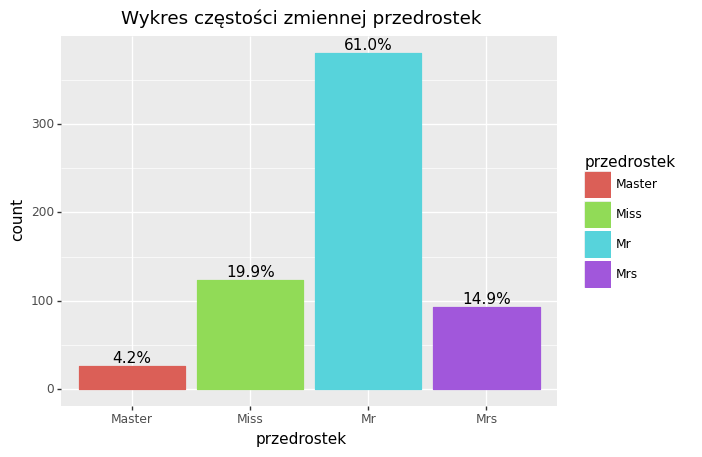

<ggplot: (-9223371885672775701)>

In [436]:
wykres_czestosci(X_train, 'przedrostek')

In [437]:
#master niezamężny
# mr męzczyzna
# miss nizamężna
# mrs zamężna

In [438]:
X_train['zamężna kobieta'] = X_train.apply( lambda x: 1 if x['przedrostek'] == 'Mrs' else 0, axis=1)
X_test['zamężna kobieta'] = X_test.apply( lambda x: 1 if x['przedrostek'] == 'Mrs' else 0, axis=1)

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [439]:
# Nazwisko jest zbyt zróżnicowaną zmienną, usuwam, tak samo jak name

In [440]:
X_train = X_train.drop(columns=['nazwisko','Name'])
X_test = X_test.drop(columns=['nazwisko','Name'])

In [441]:
# tworzę zmienną czy dziecko mówiącą czy podróżujący ma poniżej 18 lat
X_train.loc[:,'Czy dziecko'] = X_train.apply(lambda x: 1 if x['Age']<18 else 0 , axis=1)
X_test.loc[:,'Czy dziecko'] = X_test.apply(lambda x: 1 if x['Age']<18 else 0 , axis=1)

In [442]:
# nowa zmienna mówiąca o ilości osób podróżujących na tym samym bilecie
X_train['No_ppl_on_ticket'] = X_train.groupby(['Ticket'])['Ticket'].transform('count')
X_test['No_ppl_on_ticket'] = X_test.groupby(['Ticket'])['Ticket'].transform('count')

X_test['No_ppl_on_ticket'] = X_test['No_ppl_on_ticket'].astype('object')
X_train['No_ppl_on_ticket'] = X_train['No_ppl_on_ticket'].astype('object')

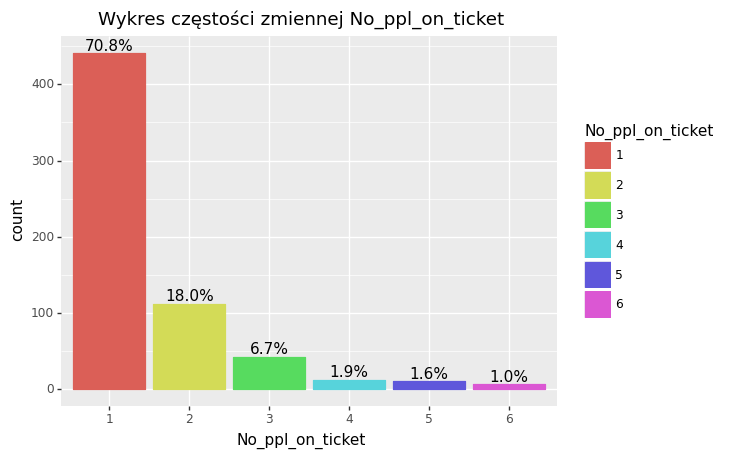

<ggplot: (151181798783)>

In [443]:
wykres_czestosci(X_train, 'No_ppl_on_ticket')

In [444]:
# redukuje mało liczne kategorie 
def liczba_osob_na_bil(x):
    if x['No_ppl_on_ticket'] >= 4:
        return '3+'
    else:
        return str(x['No_ppl_on_ticket'])

In [445]:
X_test['No_ppl_on_ticket'] = X_test.apply(liczba_osob_na_bil, axis=1)
X_train['No_ppl_on_ticket'] = X_train.apply(liczba_osob_na_bil, axis=1)

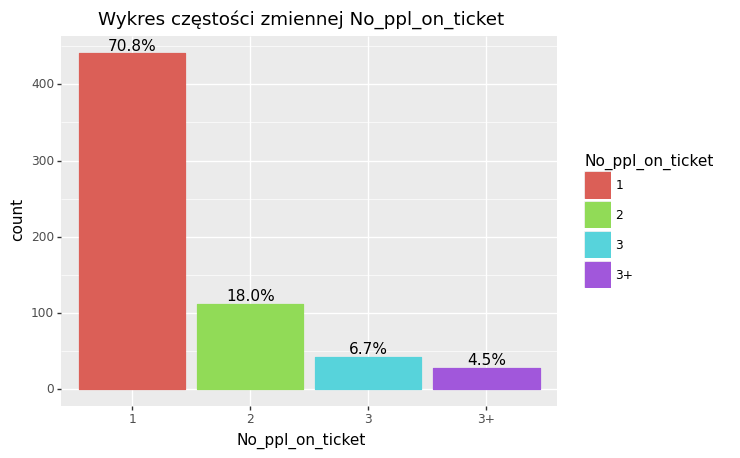

<ggplot: (151180184149)>

In [446]:
wykres_czestosci(X_train, 'No_ppl_on_ticket')

In [447]:
# usuwam zmienną PassengerId, za mało mówi 
X_train.drop(columns=['PassengerId'], inplace = True)
X_test.drop(columns=['PassengerId'], inplace = True)

In [448]:
# zmieniam typy zmiennych
X_train.loc[:,'Pclass'] = X_train.loc[:,'Pclass'].astype('object')
X_train.loc[:,'SibSp'] = X_train.loc[:,'SibSp'].astype('object')
X_train.loc[:,'Parch'] = X_train.loc[:,'Parch'].astype('object')


X_test.loc[:,'Parch'] = X_test.loc[:,'Parch'].astype('object')
X_test.loc[:,'Pclass'] = X_test.loc[:,'Pclass'].astype('object')
X_test.loc[:,'SibSp'] = X_test.loc[:,'SibSp'].astype('object')

In [449]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            623 non-null    object 
 1   Sex               623 non-null    object 
 2   Age               504 non-null    float64
 3   SibSp             623 non-null    object 
 4   Parch             623 non-null    object 
 5   Ticket            623 non-null    object 
 6   Fare              623 non-null    float64
 7   Cabin             136 non-null    object 
 8   Embarked          621 non-null    object 
 9   przedrostek       623 non-null    object 
 10  zamężna kobieta   623 non-null    int64  
 11  Czy dziecko       623 non-null    int64  
 12  No_ppl_on_ticket  623 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 68.1+ KB


In [450]:
# printuje zmienne, i rozpoznaje które mają braki danych
for i in X_train.columns:
    print(i)
    print(X_train.loc[X_train[i].isnull(),i])

Pclass
Series([], Name: Pclass, dtype: object)
Sex
Series([], Name: Sex, dtype: object)
Age
45    NaN
28    NaN
633   NaN
727   NaN
740   NaN
       ..
709   NaN
330   NaN
223   NaN
451   NaN
680   NaN
Name: Age, Length: 119, dtype: float64
SibSp
Series([], Name: SibSp, dtype: object)
Parch
Series([], Name: Parch, dtype: object)
Ticket
Series([], Name: Ticket, dtype: object)
Fare
Series([], Name: Fare, dtype: float64)
Cabin
45     NaN
28     NaN
633    NaN
403    NaN
720    NaN
      ... 
104    NaN
680    NaN
476    NaN
190    NaN
736    NaN
Name: Cabin, Length: 487, dtype: object
Embarked
829    NaN
61     NaN
Name: Embarked, dtype: object
przedrostek
Series([], Name: przedrostek, dtype: object)
zamężna kobieta
Series([], Name: zamężna kobieta, dtype: int64)
Czy dziecko
Series([], Name: Czy dziecko, dtype: int64)
No_ppl_on_ticket
Series([], Name: No_ppl_on_ticket, dtype: object)


In [451]:
np.unique(X_train['Cabin'].astype('str'))

array(['A10', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31', 'A32',
       'A34', 'A36', 'A5', 'A7', 'B101', 'B18', 'B19', 'B20', 'B22',
       'B28', 'B30', 'B35', 'B37', 'B39', 'B4', 'B42', 'B49', 'B5', 'B50',
       'B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60', 'B69', 'B73', 'B77',
       'B78', 'B80', 'B82 B84', 'B86', 'B96 B98', 'C104', 'C106', 'C110',
       'C118', 'C123', 'C124', 'C125', 'C148', 'C2', 'C22 C26', 'C32',
       'C45', 'C46', 'C47', 'C49', 'C54', 'C62 C64', 'C65', 'C68', 'C7',
       'C70', 'C78', 'C83', 'C86', 'C90', 'C91', 'C92', 'C93', 'C95',
       'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17', 'D19', 'D20', 'D26',
       'D30', 'D33', 'D35', 'D36', 'D45', 'D47', 'D56', 'D6', 'D9', 'E10',
       'E101', 'E12', 'E121', 'E17', 'E24', 'E25', 'E33', 'E34', 'E36',
       'E38', 'E40', 'E44', 'E46', 'E58', 'E63', 'E67', 'E68', 'E77',
       'E8', 'F E69', 'F G73', 'F2', 'F33', 'F4', 'G6', 'T', 'nan'],
      dtype=object)

In [452]:
# uzupełniam braki danych w zmiennej Cabin i Embarked
X_train['Cabin'].fillna('OTHER', inplace=True)
X_test['Cabin'].fillna('OTHER', inplace=True)

X_train['Embarked'].fillna('OTHER', inplace = True)
X_test['Embarked'].fillna('OTHER', inplace = True)

In [453]:
# zachowuje tylko pierwszą literę z  wartości jakie przyjmuje zmienna Cabin, ograiczając liczbę unikalnych wartości

In [454]:
X_train['Cabin'] = X_train['Cabin'].str[:1]
X_test['Cabin'] = X_test['Cabin'].str[:1]

np.unique(X_train['Cabin'].str[:1])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'O', 'T'], dtype=object)

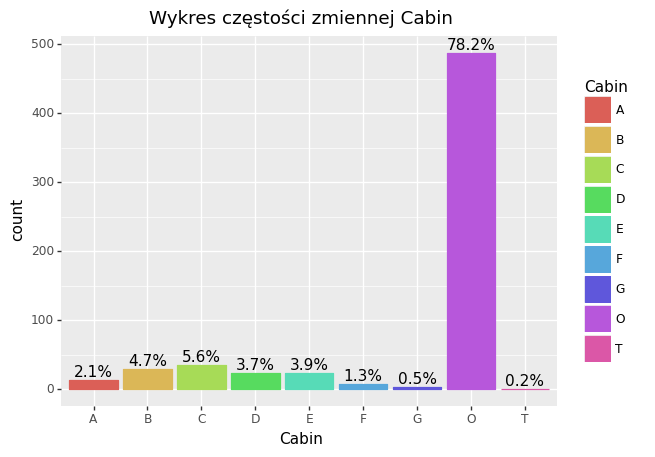

<ggplot: (-9223371885674177911)>

In [455]:
wykres_czestosci(X_train, 'Cabin')

In [456]:
# jest sporo mało licznych kategorii, sprawdzam jak jeszcze bardziej je pogrupować,
# sprawdzam z czym najbardziej skorelowana jest zmienna i grupuje w większe grupy

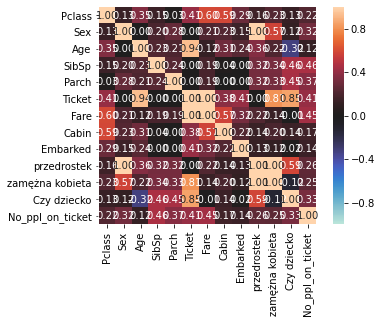

{'corr':                     Pclass       Sex       Age     SibSp     Parch    Ticket  \
 Pclass            1.000000  0.133149  0.352075  0.147624  0.027214  0.413482   
 Sex               0.133149  1.000000  0.001389  0.201117  0.279606  0.000000   
 Age               0.352075  0.001389  1.000000  0.225511  0.205022  0.936977   
 SibSp             0.147624  0.201117  0.225511  1.000000  0.236231  0.000000   
 Parch             0.027214  0.279606  0.205022  0.236231  1.000000  0.000000   
 Ticket            0.413482  0.000000  0.936977  0.000000  0.000000  1.000000   
 Fare              0.596880  0.214030  0.120652  0.191298  0.191104  1.000000   
 Cabin             0.588804  0.234065  0.312033  0.038749  0.000000  0.378336   
 Embarked          0.291102  0.153460  0.240310  0.000000  0.000000  0.408916   
 przedrostek       0.161921  0.998388  0.363124  0.320463  0.321156  0.000000   
 zamężna kobieta   0.227155  0.572976  0.215261  0.335846  0.325126  0.806025   
 Czy dziecko       0

In [457]:
nom_col = list(X_train.select_dtypes('object').columns)
dython.nominal.associations(X_train, nominal_columns=nom_col)

In [458]:
# występuje korelacja między kabiną a klasą, sprawdźmy grupowanie między dwoma cechami

In [459]:
X_train.groupby(['Pclass','Cabin'])['Cabin'].aggregate('count')

Pclass  Cabin
1       A         13
        B         29
        C         35
        D         20
        E         19
        O         30
        T          1
2       D          3
        E          3
        F          6
        O        118
3       E          2
        F          2
        G          3
        O        339
Name: Cabin, dtype: int64

In [460]:
# wszystkie kabiny abc są w klasie pierwszej - grupuje w jedno, tak samo de i fg

In [461]:
def group_cab(x):
    if x['Cabin'] in ('A','B','C'):
        return 'ABC'
    elif x['Cabin'] in ('D','E'):
        return 'DE'
    elif x['Cabin'] in ('F','G'):
        return 'FG'
    else:
        return 'O'

In [462]:
X_train['Cabin'] = X_train.apply(group_cab, axis=1)
X_test['Cabin'] = X_test.apply(group_cab, axis=1)

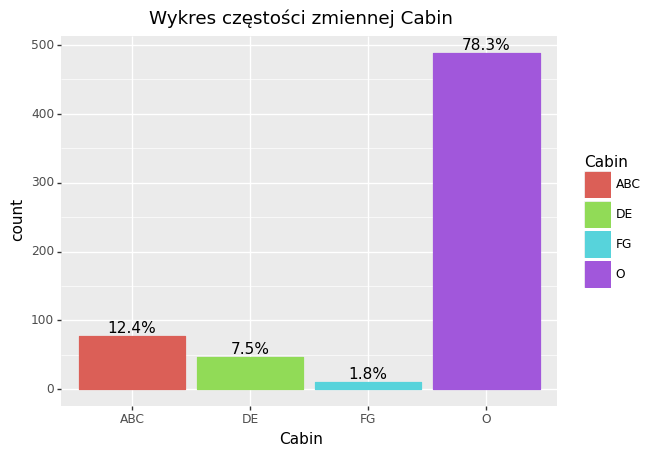

<ggplot: (151186375144)>

In [463]:
wykres_czestosci(X_train, 'Cabin')

In [464]:
# sprawdzam wartości unikalne zmiennej Embarked, zmieniam jej typ na object

In [465]:
np.unique(X_train['Embarked'].astype('str'))

array(['C', 'OTHER', 'Q', 'S'], dtype=object)

In [466]:
X_train['Embarked'] = X_train['Embarked'].astype('object')

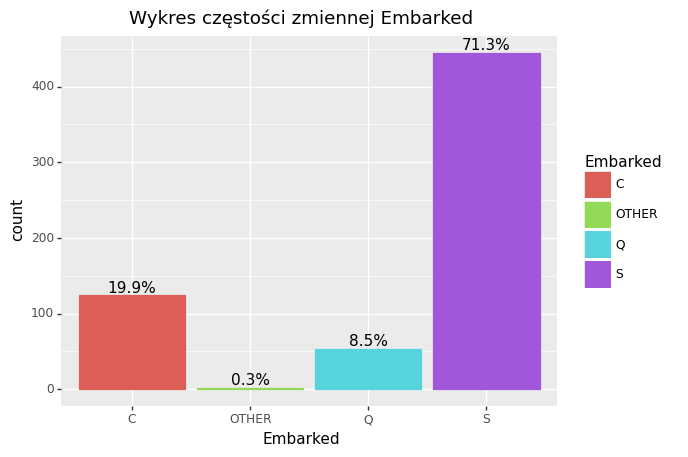

<ggplot: (-9223371885669571682)>

In [467]:
wykres_czestosci(X_train, 'Embarked')

In [468]:
# zmienna wiek

In [469]:
# wiek najbardziej skorelowany z kabiną i Pclass, wypełnię średnią w grupach
X_train.groupby(['Pclass','Cabin'])['Age'].mean()

Pclass  Cabin
1       ABC      32.953506
        DE       38.615385
        O        27.225806
2       DE       32.583333
        FG       15.833333
        O        28.871441
3       DE       19.000000
        FG       15.200000
        O        19.009351
Name: Age, dtype: float64

In [470]:
X_train['Age'] = X_train.groupby(['Pclass','Cabin'])['Age'].transform(lambda x: x.fillna(x.mean()))
X_test['Age'] = X_test.groupby(['Pclass','Cabin'])['Age'].transform(lambda x: x.fillna(x.mean()))

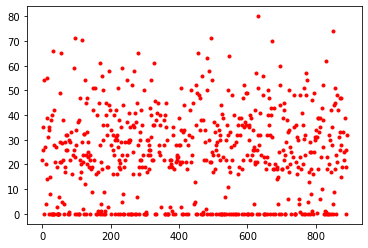

In [471]:
plt.plot(X_train['Age'], 'r.')

{'whiskers': [<matplotlib.lines.Line2D at 0x23336a6d198>,
 'caps': [<matplotlib.lines.Line2D at 0x23336a6d8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23336a6d048>],
 'medians': [<matplotlib.lines.Line2D at 0x23336a6df98>],
 'fliers': [<matplotlib.lines.Line2D at 0x23336a76320>],
 'means': []}

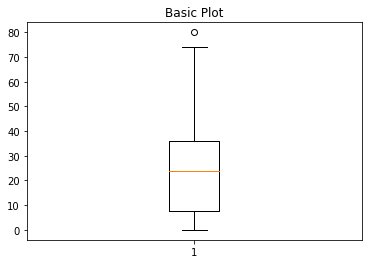

In [472]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(X_train['Age'])

(array([0.08005618, 0.01023274, 0.00361156, 0.00421348, 0.0024077 ,
        0.00361156, 0.02227127, 0.02949438, 0.02166934, 0.02708668,
        0.02347512, 0.01745586, 0.02467897, 0.02046549, 0.01264045,
        0.01625201, 0.0114366 , 0.00541734, 0.0114366 , 0.00722311,
        0.00421348, 0.00481541, 0.00300963, 0.00120385, 0.00300963,
        0.        , 0.0024077 , 0.00060193, 0.        , 0.00060193]),
 array([ 0.        ,  2.66666667,  5.33333333,  8.        , 10.66666667,
        13.33333333, 16.        , 18.66666667, 21.33333333, 24.        ,
        26.66666667, 29.33333333, 32.        , 34.66666667, 37.33333333,
        40.        , 42.66666667, 45.33333333, 48.        , 50.66666667,
        53.33333333, 56.        , 58.66666667, 61.33333333, 64.        ,
        66.66666667, 69.33333333, 72.        , 74.66666667, 77.33333333,
        80.        ]),
 <a list of 30 Patch objects>)

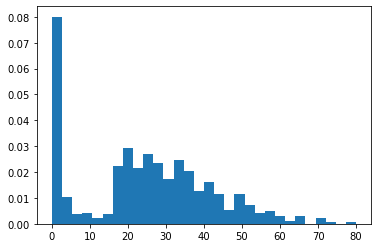

In [473]:
plt.hist(X_train['Age'], density=True, bins=30)

In [474]:
# binuje co 15 lat 

In [475]:
def age_binning(x):
    if x['Age'] <=15:
        return 'dziecko <=15'
    elif x['Age'] <= 30:
        return ' młody dorosły <=30'
    elif x['Age'] <= 45:
        return ' dorosły <=45'
    else:
        return ' starszy dorosły i osoby starsze 45+'
X_train['Age'] = X_train.apply(age_binning, axis=1)
X_test['Age'] = X_test.apply(age_binning, axis=1)

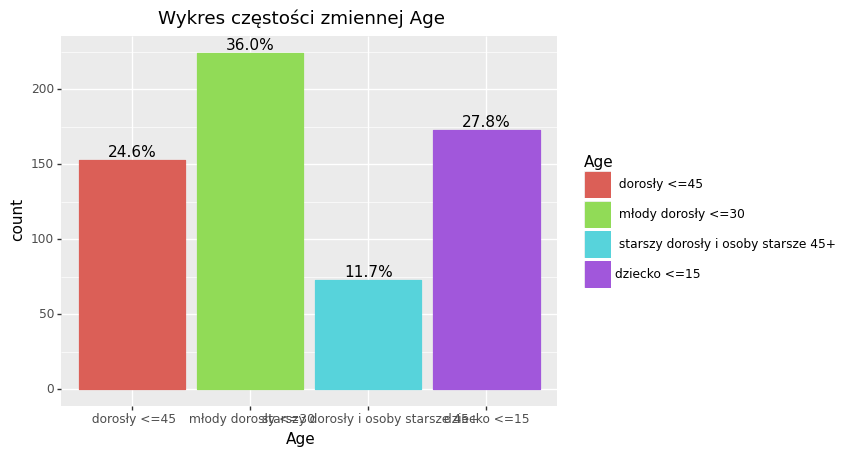

<ggplot: (151186622633)>

In [476]:
wykres_czestosci(X_train, 'Age')

In [477]:
# zmienna Fare, pozbycie się wartości odstających poprzez logarytm oraz winsorizing

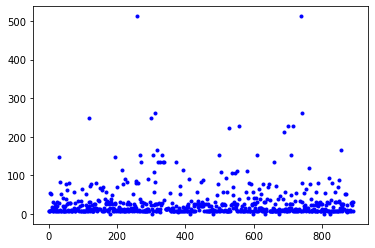

In [478]:
plt.plot(X_train['Fare'], 'b.')

{'whiskers': [<matplotlib.lines.Line2D at 0x23336f62668>,
 'caps': [<matplotlib.lines.Line2D at 0x23336f62da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23336f62518>],
 'medians': [<matplotlib.lines.Line2D at 0x23336f6d4a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23336f6d7f0>],
 'means': []}

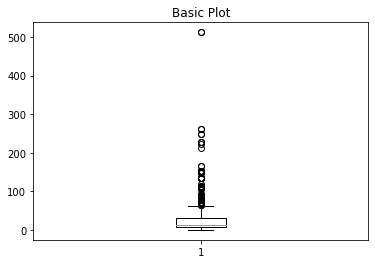

In [479]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(X_train['Fare'])

(array([0.03327265, 0.0128767 , 0.00281972, 0.00272573, 0.00263173,
        0.00075192, 0.00075192, 0.00075192, 0.00075192, 0.00018798,
        0.        , 0.        , 0.00018798, 0.00028197, 0.00018798,
        0.00018798, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00018798]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <a list of 30 Patch objects>)

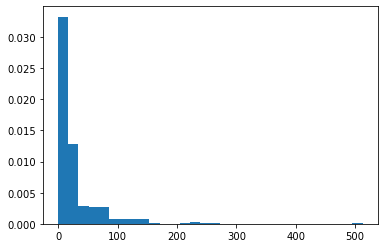

In [480]:
plt.hist(X_train['Fare'], density=True, bins=30)

(array([0.06944281, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00771587, 0.00771587, 0.04629521,
        1.6049005 , 0.30863471, 0.37807752, 0.30863471, 0.19289669,
        0.48609967, 0.37036165, 0.16974909, 0.06944281, 0.19289669,
        0.12345388, 0.18518083, 0.06172694, 0.06172694, 0.07715868,
        0.01543174, 0.05401107, 0.        , 0.        , 0.01543174]),
 array([0.        , 0.20803058, 0.41606116, 0.62409174, 0.83212231,
        1.04015289, 1.24818347, 1.45621405, 1.66424463, 1.87227521,
        2.08030578, 2.28833636, 2.49636694, 2.70439752, 2.9124281 ,
        3.12045868, 3.32848926, 3.53651983, 3.74455041, 3.95258099,
        4.16061157, 4.36864215, 4.57667273, 4.78470331, 4.99273388,
        5.20076446, 5.40879504, 5.61682562, 5.8248562 , 6.03288678,
        6.24091735]),
 <a list of 30 Patch objects>)

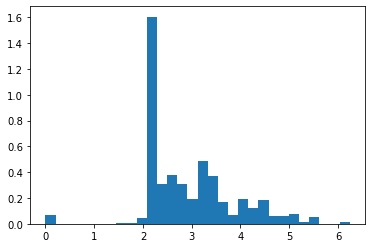

In [481]:
plt.hist(np.log(X_train['Fare']+1), density=True, bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x23336d3e470>,
 'caps': [<matplotlib.lines.Line2D at 0x23336d3ec88>,
 'boxes': [<matplotlib.lines.Line2D at 0x23336d3e2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x23336ca8d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x23336edfc88>],
 'means': []}

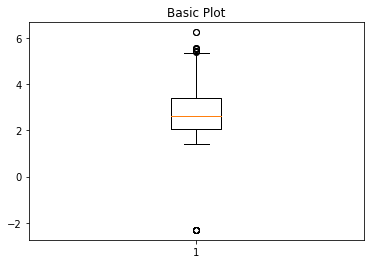

In [482]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
#ax1.boxplot(np.log(X_train['Fare']+1))
ax1.boxplot(np.log(X_train['Fare']+0.1))

In [483]:
X_train['Fare_log'] = np.log(X_train['Fare']+0.1)
X_test['Fare_log'] = np.log(X_test['Fare']+0.1)

In [484]:
# winsoriziong
def Fare_log_winsor(x):
    if x['Fare_log'] < np.percentile(X_train['Fare_log'],5):
        return np.percentile(X_train['Fare_log'],5)
    elif x['Fare_log'] > np.percentile(X_train['Fare_log'],95):
        return np.percentile(X_train['Fare_log'],95)
    else:
        return x['Fare_log']
X_train['Fare_log_winsor'] = X_train.apply(Fare_log_winsor, axis=1)

def Fare_log_winsor(x):
    if x['Fare_log'] < np.percentile(X_test['Fare_log'],5):
        return np.percentile(X_test['Fare_log'],5)
    elif x['Fare_log'] > np.percentile(X_test['Fare_log'],95):
        return np.percentile(X_test['Fare_log'],95)
    else:
        return x['Fare_log']
X_test['Fare_log_winsor'] = X_test.apply(Fare_log_winsor, axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x23336b08048>,
 'caps': [<matplotlib.lines.Line2D at 0x23336b08080>,
 'boxes': [<matplotlib.lines.Line2D at 0x23336b082b0>],
 'medians': [<matplotlib.lines.Line2D at 0x233369b40b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x233369b49e8>],
 'means': []}

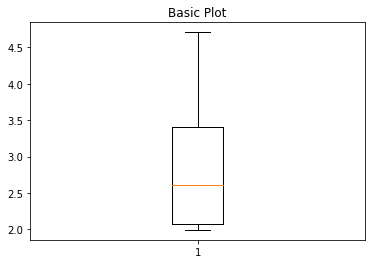

In [485]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(X_train['Fare_log_winsor'])

In [486]:
# tworzę zmienną no_fam_members określającą ilość członków rodziny na statku

In [487]:
X_train['no_fam_members'] = X_train['SibSp']+X_train['Parch']+1
X_test['no_fam_members'] = X_test['SibSp']+X_train['Parch']+1

X_train['no_fam_members'] = X_train['no_fam_members'].astype('object')
X_test['no_fam_members'] = X_test['no_fam_members'].astype('object')

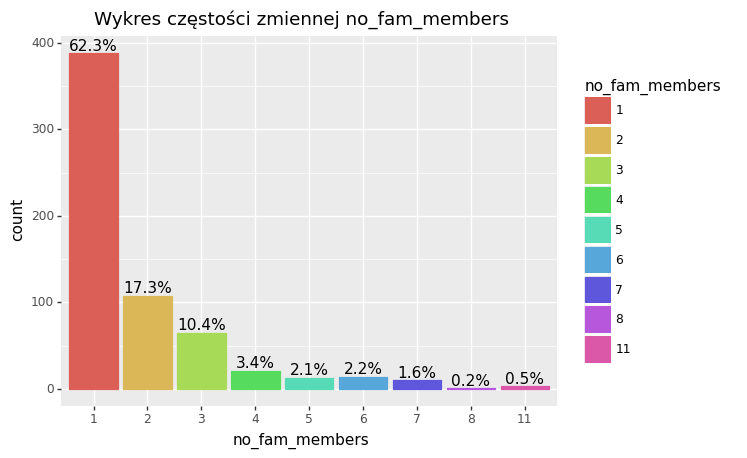

<ggplot: (151186412201)>

In [488]:
wykres_czestosci(X_train, 'no_fam_members')

In [489]:
#zmniejszenie liczby kategorii przez grupowanie
def wielkosc_rodziny(x):
    if x['no_fam_members'] < 2:
        return 'singel'
    elif ((x['no_fam_members'] >= 2) and (x['no_fam_members'] <= 4)):
        return 'mała rodzina'
    else:
        return 'duza rodzina'

X_train['no_fam_members'] = X_train.apply(wielkosc_rodziny, axis=1)
X_test['no_fam_members'] = X_test.apply(wielkosc_rodziny, axis=1)

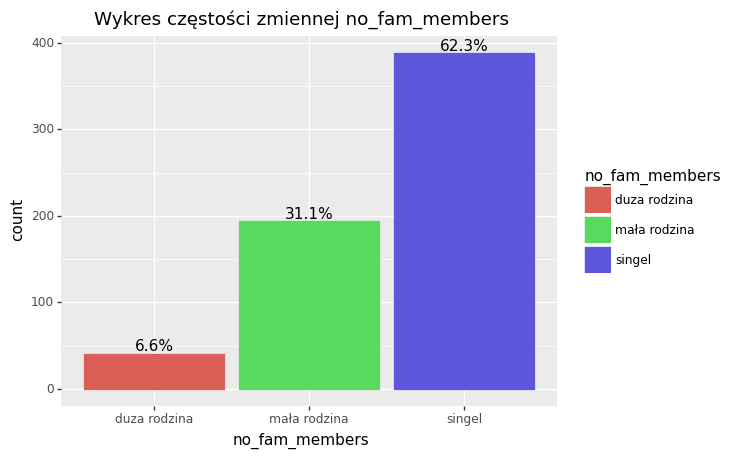

<ggplot: (151184452181)>

In [490]:
wykres_czestosci(X_train, 'no_fam_members')

In [491]:
X_train = X_train.drop(columns=['Fare','Fare_log','Ticket'])
X_test = X_test.drop(columns=['Fare','Fare_log','Ticket'])

In [492]:
# zmiana typu zmiennych
X_train['SibSp'] = X_train['SibSp'].astype('object')
X_train['Parch'] = X_train['Parch'].astype('object')

In [493]:
# korelacja

In [494]:
nom_col = list(tab_corr.select_dtypes('object').columns)
dython.nominal.associations(tab_corr, nominal_columns=nom_col)['corr']['Survived']

NameError: name 'tab_corr' is not defined

In [ ]:
# stnadaryzacja # dummys

In [495]:
from sklearn.preprocessing import StandardScaler

In [496]:
X_train[['Fare_log_winsor']] = StandardScaler().fit_transform(X_train[['Fare_log_winsor']])

In [497]:
X_test[['Fare_log_winsor']] = StandardScaler().fit_transform(X_test[['Fare_log_winsor']])

In [498]:
X_train['SibSp'] = X_train['SibSp'].astype('object')
X_train['Parch'] = X_train['Parch'].astype('object')

In [499]:
X_train = pd.concat([X_train, pd.get_dummies(X_train[list(X_train.select_dtypes('object').columns)])], axis=1) 
X_train = X_train.drop(columns= list(X_train.select_dtypes('object').columns))

In [500]:
X_test = pd.concat([X_test, pd.get_dummies(X_test[list(X_test.select_dtypes('object').columns)])], axis=1) 
X_test = X_test.drop(columns= list(X_test.select_dtypes('object').columns))

In [501]:
X_train.columns

Index(['Pclass', 'zamężna kobieta', 'Czy dziecko', 'Fare_log_winsor',
       'Sex_female', 'Sex_male', 'Age_ dorosły <=45',
       'Age_ młody dorosły <=30', 'Age_ starszy dorosły i osoby starsze 45+',
       'Age_dziecko <=15', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Cabin_ABC', 'Cabin_DE', 'Cabin_FG',
       'Cabin_O', 'Embarked_C', 'Embarked_OTHER', 'Embarked_Q', 'Embarked_S',
       'przedrostek_Master', 'przedrostek_Miss', 'przedrostek_Mr',
       'przedrostek_Mrs', 'No_ppl_on_ticket_1', 'No_ppl_on_ticket_2',
       'No_ppl_on_ticket_3', 'No_ppl_on_ticket_3+',
       'no_fam_members_duza rodzina', 'no_fam_members_mała rodzina',
       'no_fam_members_singel'],
      dtype='object')

In [502]:
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [503]:
X_test.fillna(0, inplace=True)

In [504]:
# teraz modele 

In [505]:
#model regresji logistycznej

In [506]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('precision: '+str(precision_score(y_test, y_pred)))
print('recall: '+str(recall_score(y_test, y_pred)))
print('accuray: '+str(accuracy_score(y_test, y_pred)))
print('f1 score: '+str(f1_score(y_test, y_pred, average='weighted')))

precision: 0.7719298245614035
recall: 0.42718446601941745
accuray: 0.7313432835820896
f1 score: 0.709157669101302


In [507]:
confusion_matrix(y_test, y_pred)

array([[152,  13],
       [ 59,  44]], dtype=int64)

In [508]:
# model drzewa decyzyjnego

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

spl_tree_pred = clf.predict(X_test)

print('precision: '+str(precision_score(y_test, spl_tree_pred)))
print('recall: '+str(recall_score(y_test, spl_tree_pred)))
print('accuray: '+str(accuracy_score(y_test, spl_tree_pred)))
print('f1 score: '+str(f1_score(y_test, spl_tree_pred, average='weighted')))

precision: 0.5932203389830508
recall: 0.6796116504854369
accuray: 0.6977611940298507
f1 score: 0.700822005036228


[Text(154.39042968750002, 212.004, 'przedrostek_Mr <= 0.5\ngini = 0.473\nsamples = 623\nvalue = [384, 239]\nclass = 0'),
 Text(76.65468750000001, 201.132, 'Pclass <= 2.5\ngini = 0.392\nsamples = 243\nvalue = [65, 178]\nclass = 1'),
 Text(32.400000000000006, 190.26, 'Fare_log_winsor <= 0.566\ngini = 0.105\nsamples = 126\nvalue = [7, 119]\nclass = 1'),
 Text(27.0, 179.388, 'Fare_log_winsor <= 0.54\ngini = 0.208\nsamples = 51\nvalue = [6, 45]\nclass = 1'),
 Text(24.3, 168.516, 'Age_dziecko <=15 <= 0.5\ngini = 0.18\nsamples = 50\nvalue = [5, 45]\nclass = 1'),
 Text(21.6, 157.644, 'SibSp_1 <= 0.5\ngini = 0.219\nsamples = 40\nvalue = [5, 35]\nclass = 1'),
 Text(13.5, 146.772, 'Age_ starszy dorosły i osoby starsze 45+ <= 0.5\ngini = 0.137\nsamples = 27\nvalue = [2, 25]\nclass = 1'),
 Text(8.100000000000001, 135.9, 'przedrostek_Mrs <= 0.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]\nclass = 1'),
 Text(5.4, 125.02799999999999, 'Age_ dorosły <=45 <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7

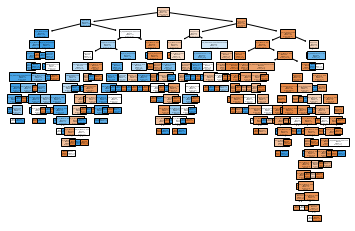

In [509]:
tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['0','1'],
                   filled=True)

In [510]:
# tuning drzewa

In [511]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]
         , 'max_depth' : [2,4,6,8,10,12], 'criterion': ['gini', 'entropy']
         }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 3528 candidates, totalling 10584 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10584 out of 10584 | elapsed:   49.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [512]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [514]:
tree_tun = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [515]:
tree_tun.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [516]:
tun_tree_pred = tree_tun.predict(X_test)

In [517]:
print('precision: '+str(precision_score(y_test, tun_tree_pred)))
print('recall: '+str(recall_score(y_test, tun_tree_pred)))
print('accuray: '+str(accuracy_score(y_test, tun_tree_pred)))
print('f1 score: '+str(f1_score(y_test, tun_tree_pred, average='weighted')))

precision: 0.6833333333333333
recall: 0.7961165048543689
accuray: 0.7798507462686567
f1 score: 0.7822635914255283


[Text(208.20375, 205.35999999999999, 'przedrostek_Mr <= 0.5\ngini = 0.473\nsamples = 623\nvalue = [384, 239]\nclass = 0'),
 Text(129.735, 181.2, 'Pclass <= 2.5\ngini = 0.392\nsamples = 243\nvalue = [65, 178]\nclass = 1'),
 Text(121.36500000000001, 157.04, 'gini = 0.105\nsamples = 126\nvalue = [7, 119]\nclass = 1'),
 Text(138.10500000000002, 157.04, 'no_fam_members_duza rodzina <= 0.5\ngini = 0.5\nsamples = 117\nvalue = [58, 59]\nclass = 1'),
 Text(104.62500000000001, 132.88, 'Age_dziecko <=15 <= 0.5\ngini = 0.459\nsamples = 87\nvalue = [31, 56]\nclass = 1'),
 Text(62.775000000000006, 108.72, 'SibSp_1 <= 0.5\ngini = 0.5\nsamples = 44\nvalue = [22, 22]\nclass = 0'),
 Text(41.85000000000001, 84.56, 'Age_ dorosły <=45 <= 0.5\ngini = 0.48\nsamples = 35\nvalue = [14, 21]\nclass = 1'),
 Text(25.110000000000003, 60.400000000000006, 'zamężna kobieta <= 0.5\ngini = 0.436\nsamples = 28\nvalue = [9, 19]\nclass = 1'),
 Text(16.740000000000002, 36.24000000000001, 'Fare_log_winsor <= -0.939\ngini = 0

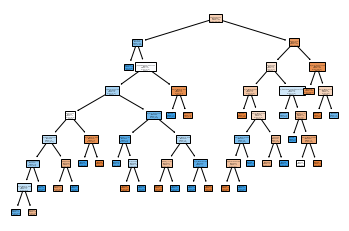

In [518]:
# rysnek wytrenowanego drzewa
tree.plot_tree(tree_tun, 
                   feature_names=list(X_train.columns),  
                   class_names=['0','1'],
                   filled=True)

In [519]:
confusion_matrix(y_test, tun_tree_pred)

array([[127,  38],
       [ 21,  82]], dtype=int64)

In [520]:
# random forest

In [521]:
las_clas = RandomForestClassifier(random_state = 1)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

siatka_las = GridSearchCV(las_clas, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
siatka_las.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  7.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [522]:
siatka_las.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [525]:
las_clas = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
                                  
                                  
las_clas.fit(X_train, y_train)
las_best_pred = las_clas.predict(X_test)

In [526]:

print('precision: '+str(precision_score(y_test, las_best_pred)))
print('recall: '+str(recall_score(y_test, las_best_pred)))
print('accuray: '+str(accuracy_score(y_test, las_best_pred)))
print('f1 score: '+str(f1_score(y_test, las_best_pred, average='weighted')))

precision: 0.7428571428571429
recall: 0.7572815533980582
accuray: 0.8059701492537313
f1 score: 0.8063114306516198


In [527]:
confusion_matrix(y_test, las_best_pred)

array([[138,  27],
       [ 25,  78]], dtype=int64)

In [528]:
X_train.columns

Index(['Pclass', 'zamężna kobieta', 'Czy dziecko', 'Fare_log_winsor',
       'Sex_female', 'Sex_male', 'Age_ dorosły <=45',
       'Age_ młody dorosły <=30', 'Age_ starszy dorosły i osoby starsze 45+',
       'Age_dziecko <=15', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Cabin_ABC', 'Cabin_DE', 'Cabin_FG',
       'Cabin_O', 'Embarked_C', 'Embarked_OTHER', 'Embarked_Q', 'Embarked_S',
       'przedrostek_Master', 'przedrostek_Miss', 'przedrostek_Mr',
       'przedrostek_Mrs', 'No_ppl_on_ticket_1', 'No_ppl_on_ticket_2',
       'No_ppl_on_ticket_3', 'No_ppl_on_ticket_3+',
       'no_fam_members_duza rodzina', 'no_fam_members_mała rodzina',
       'no_fam_members_singel'],
      dtype='object')

In [529]:
# sprawdzam jak las losowy ocenił "ważność" cech
nazwy_kol = list(X_train.columns)

In [530]:
feature_importance_tab = pd.DataFrame(columns = ["Feature","importance"])
feature_importance_tab_tymcz = feature_importance_tab

In [531]:
for i,v in enumerate(las_clas.feature_importances_):
    feature_importance_tab_tymcz.loc[0,'importance'] = v
    feature_importance_tab_tymcz.loc[0,'Feature'] = nazwy_kol[i]

    if i==0:
        feature_importance_tab =feature_importance_tab_tymcz
    else:
        feature_importance_tab = feature_importance_tab.append(feature_importance_tab_tymcz)
        

In [532]:
feature_importance_tab.sort_values(by='importance', ascending=False)

,Feature,importance
0,przedrostek_Mr,0.147343
0,Fare_log_winsor,0.117576
0,Sex_female,0.100906
0,Sex_male,0.0915393
0,przedrostek_Miss,0.0458084
0,Cabin_O,0.0408814
0,przedrostek_Mrs,0.0358816
0,No_ppl_on_ticket_3+,0.0251106
0,no_fam_members_duza rodzina,0.0249699
0,zamężna kobieta,0.0235745


In [533]:
# SVM

In [534]:
from sklearn.svm import SVC

In [535]:
svm_class = SVC(gamma='auto',random_state=1, kernel = 'rbf')
svm_class.fit(X_train, y_train)
svm_pred = svm_class.predict(X_test)

In [536]:

print('precision: '+str(precision_score(y_test, svm_pred)))
print('recall: '+str(recall_score(y_test, svm_pred)))
print('accuray: '+str(accuracy_score(y_test, svm_pred)))
print('f1 score: '+str(f1_score(y_test, svm_pred, average='weighted')))

precision: 0.7352941176470589
recall: 0.7281553398058253
accuray: 0.7947761194029851
f1 score: 0.7945855792146774


In [537]:
# xgboost

In [538]:
import xgboost as xgb

In [539]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [540]:
# wśród nazw kolumn były znaki <>, zmiana wszelkich znaków które wyrzucają błąd w xgboost

In [541]:
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [542]:
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [543]:
xgbmod = xgb.XGBClassifier(objective="binary:logistic", random_state=32,use_label_encoder=False)
xgbmod.fit(X_train, y_train)
xgb_pred = xgbmod.predict(X_test)

[00:56:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [544]:
print('precision: '+str(precision_score(y_test, xgb_pred)))
print('recall: '+str(recall_score(y_test, xgb_pred)))
print('accuray: '+str(accuracy_score(y_test, xgb_pred)))
print('f1 score: '+str(f1_score(y_test, xgb_pred, average='weighted')))

precision: 0.7281553398058253
recall: 0.7281553398058253
accuray: 0.7910447761194029
f1 score: 0.7910447761194029


In [545]:
# sieć neuronowa

In [546]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=5000, random_state=1)

In [547]:
parametry_mlp = {
    'hidden_layer_sizes': [(10,20,10),(50,50,50,50), (50,100,100,50),(50,50,50), (50,100,50), (100,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.001, 0.05, 0.1, 0.0005],
    'learning_rate': ['constant','adaptive'],
}

In [548]:
mlp_classifier_grid = GridSearchCV(mlp, parametry_mlp, n_jobs=-1, cv=3)
mlp_classifier_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=5000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.001, 0.05, 0.1, 0.0005],
                         'hidden_layer_sizes': [(10, 20, 10), (50, 50, 50, 50),
                 

In [549]:
mlp_classifier_grid.best_estimator_

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [550]:
mlp_best = MLPClassifier( activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
mlp_best.fit(X_train, y_train)
mlp_predict = mlp_classifier_grid.predict(X_test)

In [551]:
print('precision: '+str(precision_score(y_test, mlp_predict)))
print('recall: '+str(recall_score(y_test, mlp_predict)))
print('accuray: '+str(accuracy_score(y_test, mlp_predict)))
print('f1 score: '+str(f1_score(y_test, mlp_predict, average='weighted')))

precision: 0.71875
recall: 0.6699029126213593
accuray: 0.7723880597014925
f1 score: 0.7707487568494851


In [ ]:
# zmiany na zbiorze test do utworznia prognozy do kaggle

In [552]:
test_fin = pd.read_csv('titanic_test.csv')

In [553]:
test_fin['nazwisko'] = test_fin.apply(lambda x: x['Name'][:x['Name'].index(',')], axis=1)
test_fin['przedrostek'] = test_fin.apply(lambda x: x['Name'][x['Name'].index(',')+2:x['Name'].index('.')], axis=1)
test_fin['przedrostek'] = test_fin.apply(zamiana_przedostków, axis=1)
test_fin['zamężna kobieta'] = test_fin.apply( lambda x: 1 if x['przedrostek'] == 'Mrs' else 0, axis=1)

test_fin = test_fin.drop(columns=['nazwisko','Name'])

test_fin.loc[:,'Czy dziecko'] = test_fin.apply(lambda x: 1 if x['Age']<18 else 0 , axis=1)
test_fin['No_ppl_on_ticket'] = test_fin.groupby(['Ticket'])['Ticket'].transform('count')
test_fin['No_ppl_on_ticket'] = test_fin['No_ppl_on_ticket'].astype('object')
test_fin['No_ppl_on_ticket'] = test_fin.apply(liczba_osob_na_bil, axis=1)

test_fin.drop(columns=['PassengerId'], inplace = True)


test_fin.loc[:,'Parch'] = test_fin.loc[:,'Parch'].astype('object')
test_fin.loc[:,'Pclass'] = test_fin.loc[:,'Pclass'].astype('object')
test_fin.loc[:,'SibSp'] = test_fin.loc[:,'SibSp'].astype('object')

test_fin['Cabin'].fillna('OTHER', inplace=True)
test_fin['Embarked'].fillna('OTHER', inplace = True)

test_fin['Cabin'] = test_fin['Cabin'].str[:1]
test_fin['Cabin'] = test_fin.apply(group_cab, axis=1)
test_fin['Age'] = test_fin.groupby(['Pclass','Cabin'])['Age'].transform(lambda x: x.fillna(x.mean()))
test_fin['Age'] = test_fin.apply(age_binning, axis=1)

In [554]:
test_fin['Fare_log'] = np.log(test_fin['Fare']+0.1)

def Fare_log_winsor(x):
    if x['Fare_log'] < np.percentile(test_fin['Fare_log'],5):
        return np.percentile(test_fin['Fare_log'],5)
    elif x['Fare_log'] > np.percentile(test_fin['Fare_log'],95):
        return np.percentile(test_fin['Fare_log'],95)
    else:
        return x['Fare_log']

test_fin['Fare_log_winsor'] = test_fin.apply(Fare_log_winsor, axis=1)
test_fin['no_fam_members'] = test_fin['SibSp']+test_fin['Parch']+1

test_fin['no_fam_members'] = test_fin['no_fam_members'].astype('object')

test_fin['no_fam_members'] = test_fin.apply(wielkosc_rodziny, axis=1)

test_fin = test_fin.drop(columns = ['Ticket'])
test_fin = test_fin.drop(columns=['Fare','Fare_log'])

In [555]:
test_fin.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked',
       'przedrostek', 'zamężna kobieta', 'Czy dziecko', 'No_ppl_on_ticket',
       'Fare_log_winsor', 'no_fam_members'],
      dtype='object')

In [556]:
X_train.columns

Index(['Pclass', 'zamężna kobieta', 'Czy dziecko', 'Fare_log_winsor',
       'Sex_female', 'Sex_male', 'Age_ dorosły _=45',
       'Age_ młody dorosły _=30', 'Age_ starszy dorosły i osoby starsze 45+',
       'Age_dziecko _=15', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Cabin_ABC', 'Cabin_DE', 'Cabin_FG',
       'Cabin_O', 'Embarked_C', 'Embarked_OTHER', 'Embarked_Q', 'Embarked_S',
       'przedrostek_Master', 'przedrostek_Miss', 'przedrostek_Mr',
       'przedrostek_Mrs', 'No_ppl_on_ticket_1', 'No_ppl_on_ticket_2',
       'No_ppl_on_ticket_3', 'No_ppl_on_ticket_3+',
       'no_fam_members_duza rodzina', 'no_fam_members_mała rodzina',
       'no_fam_members_singel'],
      dtype='object')

In [557]:
test_fin[['Fare_log_winsor']] = StandardScaler().fit_transform(test_fin[['Fare_log_winsor']])
test_fin = pd.concat([test_fin, pd.get_dummies(test_fin[list(test_fin.select_dtypes('object').columns)])], axis=1) 
test_fin = test_fin.drop(columns= list(test_fin.select_dtypes('object').columns))

In [558]:
X_train, test_fin = X_train.align(test_fin, join='left', axis=1)
test_fin.fillna(0, inplace=True)

In [559]:
test_fin.columns

Index(['Pclass', 'zamężna kobieta', 'Czy dziecko', 'Fare_log_winsor',
       'Sex_female', 'Sex_male', 'Age_ dorosły _=45',
       'Age_ młody dorosły _=30', 'Age_ starszy dorosły i osoby starsze 45+',
       'Age_dziecko _=15', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Cabin_ABC', 'Cabin_DE', 'Cabin_FG',
       'Cabin_O', 'Embarked_C', 'Embarked_OTHER', 'Embarked_Q', 'Embarked_S',
       'przedrostek_Master', 'przedrostek_Miss', 'przedrostek_Mr',
       'przedrostek_Mrs', 'No_ppl_on_ticket_1', 'No_ppl_on_ticket_2',
       'No_ppl_on_ticket_3', 'No_ppl_on_ticket_3+',
       'no_fam_members_duza rodzina', 'no_fam_members_mała rodzina',
       'no_fam_members_singel'],
      dtype='object')

In [560]:
X_train.columns

Index(['Pclass', 'zamężna kobieta', 'Czy dziecko', 'Fare_log_winsor',
       'Sex_female', 'Sex_male', 'Age_ dorosły _=45',
       'Age_ młody dorosły _=30', 'Age_ starszy dorosły i osoby starsze 45+',
       'Age_dziecko _=15', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Cabin_ABC', 'Cabin_DE', 'Cabin_FG',
       'Cabin_O', 'Embarked_C', 'Embarked_OTHER', 'Embarked_Q', 'Embarked_S',
       'przedrostek_Master', 'przedrostek_Miss', 'przedrostek_Mr',
       'przedrostek_Mrs', 'No_ppl_on_ticket_1', 'No_ppl_on_ticket_2',
       'No_ppl_on_ticket_3', 'No_ppl_on_ticket_3+',
       'no_fam_members_duza rodzina', 'no_fam_members_mała rodzina',
       'no_fam_members_singel'],
      dtype='object')

In [561]:
las_best_pred_fin = las_clas.predict(test_fin)

In [562]:
las_best_pred_fin

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [563]:
test_fin = pd.read_csv('titanic_test.csv')
test_fin_pred = test_fin[['PassengerId']]
test_fin_pred['Survived'] = las_best_pred_fin
test_fin_pred.to_csv('final_pred.csv')

C:\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
